In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving BankChurners.csv.zip to BankChurners.csv.zip


In [ ]:
df=pd.read_csv('BankChurners.csv.zip')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


# **DATA EXPLORATION**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [ ]:
df.shape

(10127, 23)

In [ ]:
df.size

232921

In [ ]:
#To get statistical Report
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [ ]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

Attrition_Flag                                                                                                                            2
Gender                                                                                                                                    2
Marital_Status                                                                                                                            4
Card_Category                                                                                                                             4
Dependent_count                                                                                                                           6
Income_Category                                                                                                                           6
Total_Relationship_Count                                                                                                                  6
Months_Inactive_12_m

### **DATA PRE_PROCESSING** **and EDA**

In [ ]:
#Finding duplicates value
counter = 0
r,c = df.shape

df1 = df.copy()
df1.drop_duplicates(inplace=True)
df1.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-df1.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [ ]:
#checking null values
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

No null value presents

Removing unwanted column

In [ ]:
# Dropping the last two columns and the client number column
df = df.iloc[:,1:-2]

([<matplotlib.patches.Wedge at 0x7fed41de6d60>,
 [Text(-0.9628371444551311, 0.5319254019667504, '0'),
  Text(0.9628371693563555, -0.5319253568930898, '1')],
 [Text(-0.525183896975526, 0.29014112834550015, '84%'),
  Text(0.5251839105580121, -0.2901411037598671, '16%')])

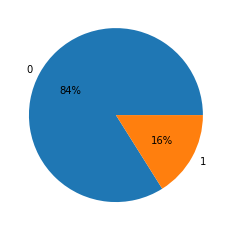

In [ ]:
plt.pie(x=df.Attrition_Flag.value_counts(), labels =df.Attrition_Flag.unique(),autopct='%0.0f%%')

([<matplotlib.patches.Wedge at 0x7fed41daaca0>,
 [Text(0.6214968632677306, 0.9076021424326697, 'High School'),
  Text(-0.922280434335642, 0.5994987910260201, 'Graduate'),
  Text(-0.9549794425143646, -0.5459068275584704, 'Uneducated'),
  Text(-0.13055766118915338, -1.0922246550526218, 'Unknown'),
  Text(0.6714521883201451, -0.8712932679644029, 'College'),
  Text(0.995277765378892, -0.4684252018651424, 'Post-Graduate'),
  Text(1.0892515519913137, -0.15339835880645664, 'Doctorate')],
 [Text(0.3389982890551257, 0.4950557140541834, '31%'),
  Text(-0.5030620550921683, 0.3269993405596473, '20%'),
  Text(-0.520897877735108, -0.29776736048643837, '15%'),
  Text(-0.0712132697395382, -0.5957589027559754, '15%'),
  Text(0.36624664817462455, -0.47525087343512873, '10%'),
  Text(0.5428787811157592, -0.25550465556280494, '5%'),
  Text(0.5941372101770802, -0.08367183207624906, '4%')])

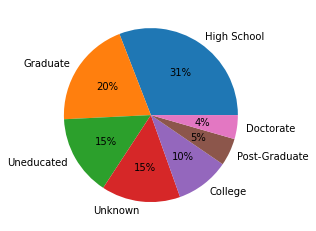

In [ ]:
colors = sns.color_palette('dark')
plt.pie(df.Education_Level.value_counts(), labels=df.Education_Level.unique(),autopct='%0.0f%%')

In [ ]:
plt.hist(scaled_features['Months_Inactive_12_mon'],color='#6C3526')
plt.title('Histogram of Months_Inactive_12_mon')
plt.xlabel('Months_Inactive_12_mon')
plt.ylabel('count')
plt.show

**Feature engineering**



**Encoding the categorical value**

In [ ]:
# Changing the Attrition_Flag to 0 and 1 (Hidden Input/Output)
df["Attrition_Flag"] = df["Attrition_Flag"].map({"Existing Customer":0, "Attrited Customer":1})

In [ ]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
#Now one hot encoding
df_new=pd.get_dummies(df, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'],drop_first=False)
print(df_new.shape)

(10127, 38)


In [ ]:
df_new.columns

Index(['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_F', 'Gender_M', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Plat

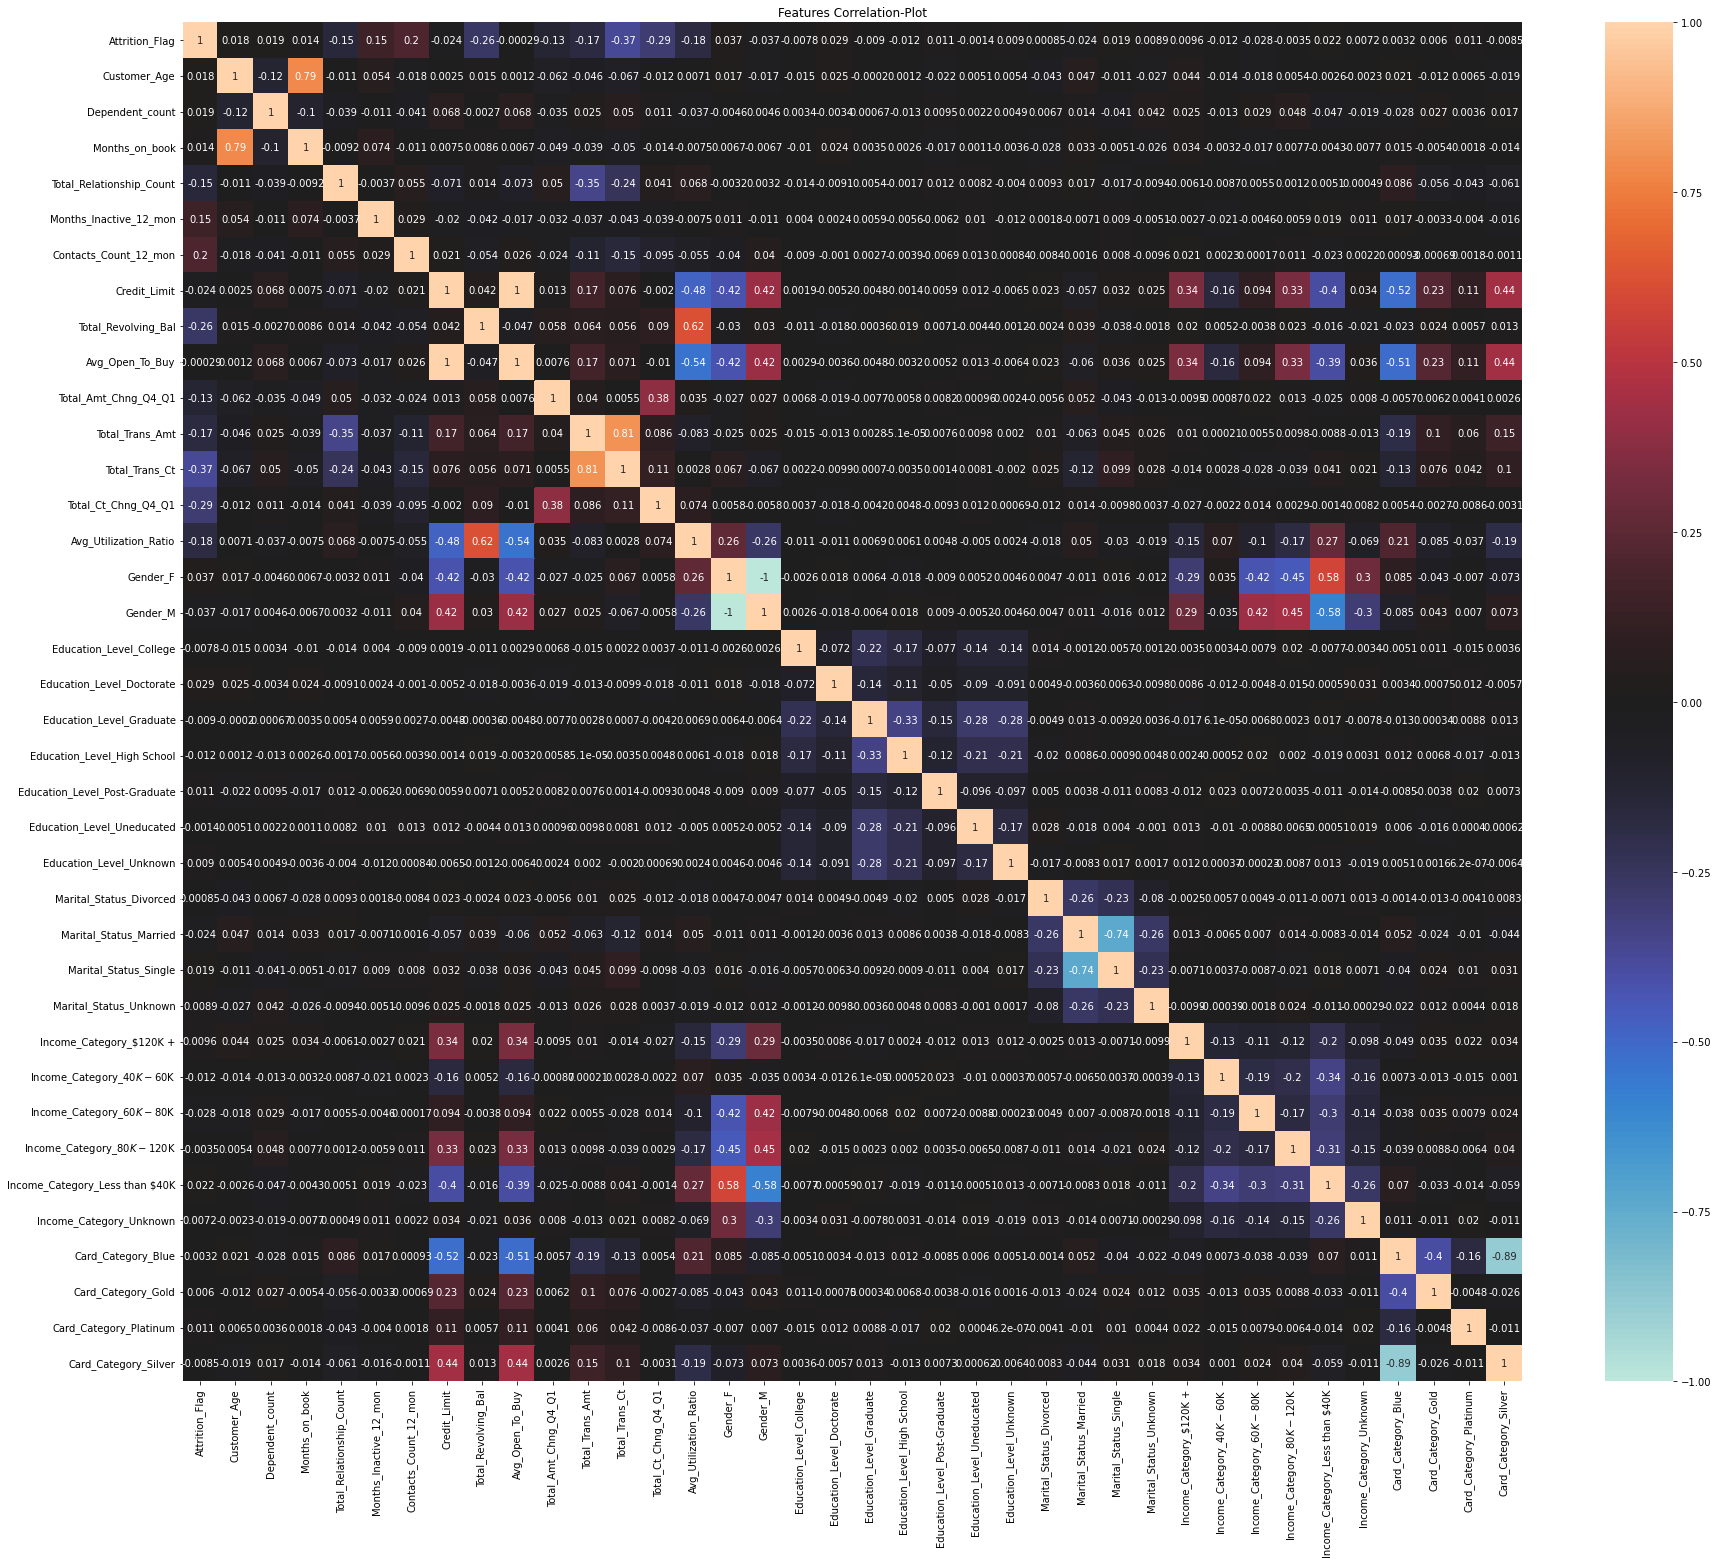

In [ ]:
#Feature Selection
#Checking the correlation

features = df_new.columns
plt.figure(figsize=[30,25])
plt.title('Features Correlation-Plot')
sns.heatmap(df_new[features].corr(), vmin=-1, vmax=1, center=0, annot=True) #,
plt.show()

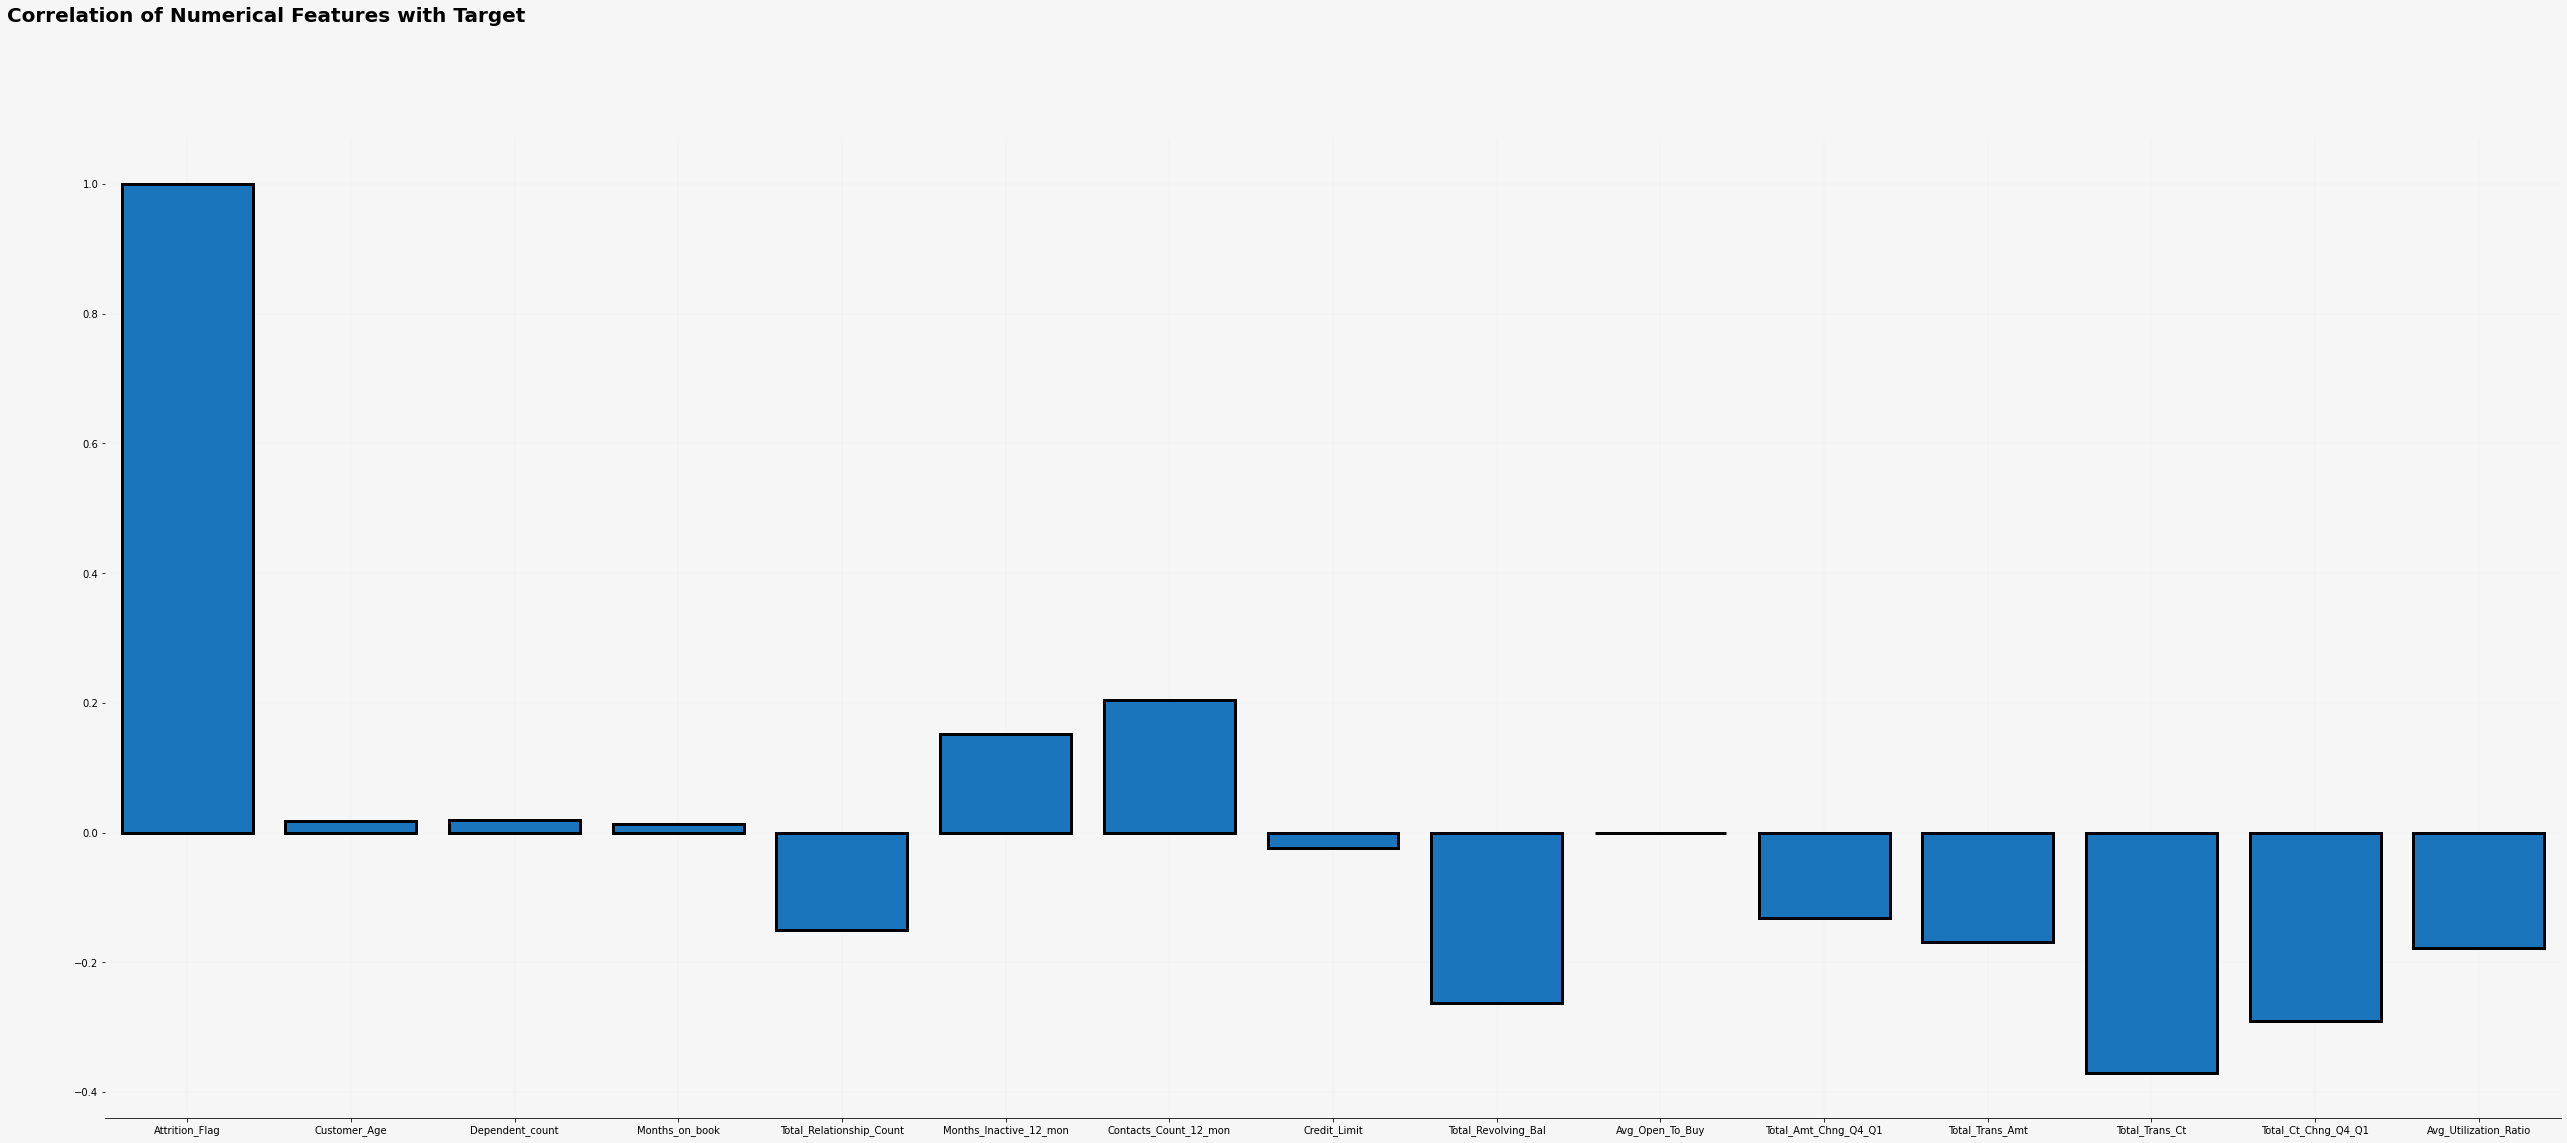

In [ ]:
import matplotlib
background_color = "#f6f6f6"

fig = plt.figure(figsize=(44,18), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])
colors = ["#0078d7"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

ax0.set_facecolor(background_color)
ax0.text(-1.1, 1.25, 'Correlation of Numerical Features with Target', fontsize=20, fontweight='bold')

chart_df = pd.DataFrame(df.corrwith(df['Attrition_Flag']))
chart_df.columns = ['corr']
sns.barplot(x=chart_df.index, y=chart_df['corr'], ax=ax0, color='#0078d7', zorder=3, edgecolor='black', linewidth=3)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.set_ylabel('')

for s in ["top","right", 'left']:
    ax0.spines[s].set_visible(False)

plt.show()

## **Splitting dataset into training and into testing set**

In [ ]:
x=df_new.drop(['Attrition_Flag'],axis=  1)
x

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0,0,1,0,0,0,1,0,0,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,0,0,0,0,1,0,1,0,0,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0,0,0,1,0,0,1,0,0,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,0,0,0,0,1,0,1,0,0,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,...,0,1,0,0,0,0,1,0,0,0
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,...,0,1,0,0,0,0,1,0,0,0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,...,0,0,0,0,1,0,1,0,0,0
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
y = df['Attrition_Flag']
y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30,random_state = 0)

In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)


# **#Modeling**

# 1.Decision tree

In [ ]:

# Create Decision Tree classifer object
from sklearn import metrics
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.937150378413952


In [ ]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[2484,   99],
       [  92,  364]])

In [ ]:
# DecisionTreeClassifier with gini index
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9154327081276735


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2550   33]
 [ 113  343]]


0.9519578808818691

<function matplotlib.pyplot.show(*args, **kw)>

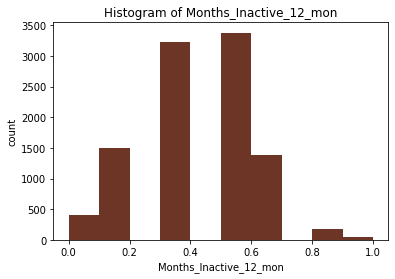

In [ ]:
plt.hist(scaled_features['Months_Inactive_12_mon'],color='#6C3526')
plt.title('Histogram of Months_Inactive_12_mon')
plt.xlabel('Months_Inactive_12_mon')
plt.ylabel('count')
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

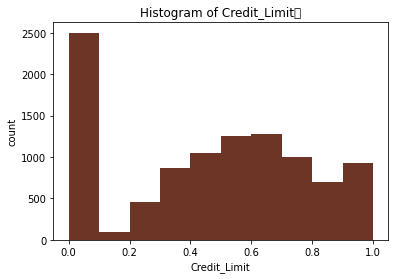

In [ ]:
plt.hist(scaled_features['Credit_Limit'],color='#6C3526')
plt.title('Histogram of Credit_Limit	')
plt.xlabel('Credit_Limit')
plt.ylabel('count')
plt.show